In [1]:
%pylab inline 

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import networkx as nx
import random as rd

Populating the interactive namespace from numpy and matplotlib


In [2]:
def init_network_state(l):
    global g
    # Set up default values for attributes
    for nd in g.nodes_iter():
        g.node[nd]['state'] = "susceptible"
    # select l number of nodes randomly and infect them
    i = 0
    while i < l:
        random_node_id = rd.choice(g.nodes())
        if g.node[random_node_id]["state"] != "infected":
            g.node[random_node_id]['state'] = "infected"
            i += 1
    
def draw():
    #PL.cla()
    global g
    colors = {}
    for nd in g.nodes():
        if g.node[nd]["state"] == "infected":
            colors[nd] = "red"
        elif g.node[nd]["state"] == "removed":
            colors[nd] = "black"
        else:
            colors[nd] = "blue"
            
    plt.figure()
    nx.draw_networkx(g, pos=None, arrows=False, with_labels=False, node_color=list(colors.values()), node_size=20, width=0.6)
    plt.show()    

In [3]:
def init_watts_strogatz_graph(n, k, p, l): 
    global g
    g = nx.watts_strogatz_graph(n, k, p) 
    init_network_state(l)

def init_powerlaw_cluster_graph(n, k, p, l): 
    global g
    g = nx.powerlaw_cluster_graph(n, k, p) 
    init_network_state(l)
    
def init_barabasi_albert_graph(n, k, l): 
    global g
    g = nx.barabasi_albert_graph(n, k) 
    init_network_state(l)
    
def init_fully_connected_network(n, l): 
    global g
    g = nx.random_regular_graph(n-1, n) 
    init_network_state(l)

In [4]:
def get_nodes_with_state(state):
    global g
    nodes = []
    nodes_state = nx.get_node_attributes(g, 'state')
    [nodes.append(i) for i in nodes_state if nodes_state[i] == state]
    return nodes

In [5]:
def stepSI(beta, infected_nodes):
    global g
    for nd in infected_nodes:
        for neighbor in g.neighbors(nd):
            if random.random() < beta and g.node[neighbor]["state"] == 'susceptible':
                g.node[neighbor]["state"] = "infected"

In [6]:
def stepIR(gamma, infected_nodes):
    global g
    for nd in infected_nodes:
        if random.random() < gamma:
            g.node[nd]["state"] = 'removed'

In [7]:
def runSIR(beta, gamma, steps):
    global g
    step = 0
    number_infected_nd = []
    number_removed_nd = []
    number_susceptible_nd = []
    while step < steps:
        
        infected_nodes = get_nodes_with_state('infected')
        stepSI(beta, infected_nodes)
        stepIR(gamma, infected_nodes)
        
        number_infected_nd.append(len(get_nodes_with_state('infected')))
        number_removed_nd.append(len(get_nodes_with_state('removed')))
        number_susceptible_nd.append(len(get_nodes_with_state('susceptible')))
        
        step = step + 1
    return [number_infected_nd, number_removed_nd, number_susceptible_nd]

In [8]:
def runSI(beta, steps):
    global g
    step = 0
    number_infected_nodes = []
    while step < steps:
        ifn = stepSI(beta)
        number_infected_nodes.append(ifn)
        step = step + 1
    return number_infected_nodes

In [9]:
# for beta = 0.8 & gamma = 0.4 we should see logistic growth curve for infected nodes
# for beta = 0.4 & gamma = 0.5 we should see exponential decay for infected nodes

In [10]:
def plot_(sim, nd, steps):
    infected_proportion = [i/nd for i in sim[0]]
    removed_proportion = [i/nd for i in sim[1]]
    steps = [i for i in range(steps)]
    plt.plot(steps, infected_proportion, label="proportion infected nd")
    plt.plot(steps, removed_proportion, label="proportion removed nd")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
    plt.ylabel('Proportion of infected nodes')
    plt.xlabel('Steps')
    plt.show()

In [11]:
init_fully_connected_network(1000, 1)

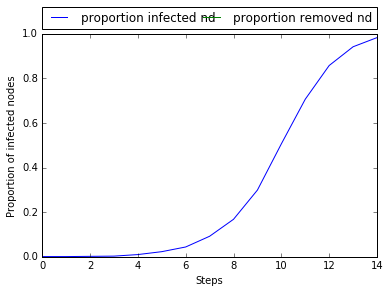

In [12]:
s1 = runSIR(0.001, 0, 15)
plot_(s1, 1000, 15)

In fully connected network infection spreads faster. To get the plot beta very small and gamma = 0. Otherwise infection spreads so fast that we can't see a lot on the plot.

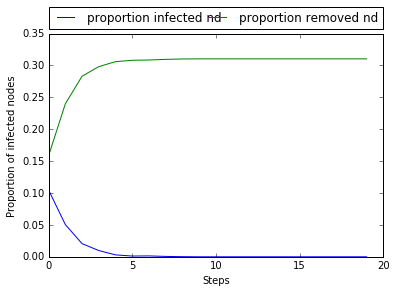

In [13]:
init_watts_strogatz_graph(5000, 5, 0.4, 1000)
s2_1 = runSIR(0.1, 0.8, 20)
plot_(s2_1, 5000, 20)

R = 0.125 There is no epidemy 

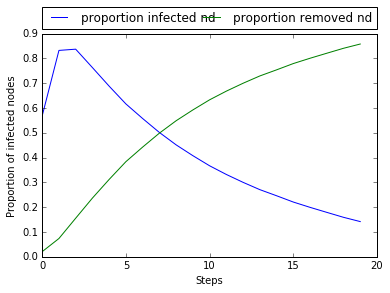

In [19]:
init_watts_strogatz_graph(5000, 5, 0.4, 1000)
s2_2 = runSIR(0.8, 0.1, 20)
plot_(s2_2, 5000, 20)

R = 8 There is epidemy 

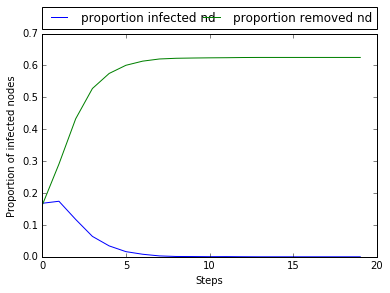

In [15]:
init_barabasi_albert_graph(5000, 5, 1000)
s3_1 = runSIR(0.1, 0.8, 20)
plot_(s3_1, 5000, 20)

R = 0.125 There is no epidemy 

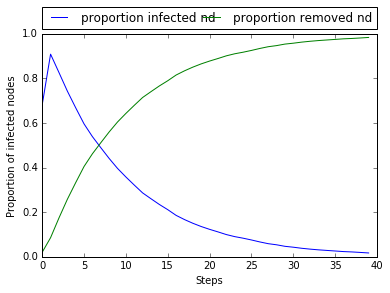

In [16]:
init_barabasi_albert_graph(5000, 5, 1000)
s3_2 = runSIR(0.6, 0.1, 40)
plot_(s3_2, 5000, 40)

R = 6 There is epidemy 

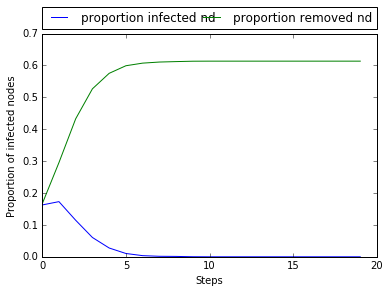

In [17]:
init_powerlaw_cluster_graph(5000, 5, 0.4, 1000)
s4_1 = runSIR(0.1, 0.8, 20)
plot_(s4_1, 5000, 20)

R = 0.125 There is no epidemy 

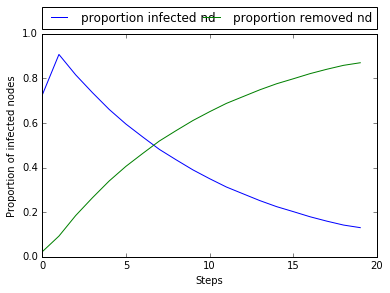

In [18]:
init_powerlaw_cluster_graph(5000, 5, 0.4, 1000)
s4_2 = runSIR(0.8, 0.1, 20)
plot_(s4_2, 5000, 20)

R = 8 There is epidemy 

### Conclusion

All in all I can see all tendencies which was described on the lecture:
 - logistic growth curve in case when beta bigger than gamma 
 - exponential decay if gamma is bigger than beta
 - Infection spreads faster in  more connected networks